Имеется окружность фиксированного диаметра, необходимо разместить в ней эллипсы (соотношение между большим и меньшим радиусами и массой эллипса фиксировано, а вот значение самой массы распределено по нормальному закону), расположив их так, чтобы они заняли как можно больше площади (необязательно искать оптимальное расположение, можно приблизительное). Все это касается первого слоя, а всего их два. Второй слой строится также как и первый, но центры масс эллипсов второго уровня должны находиться приблизительно там же, где находится центр масс треугольника образованного 3 центрами масс эллипсов первого уровня. Иными словами, эллипсы второго слое будет лежать в углублениях, образованных первым слоем. Небходимо получить какое-то количество таких комбинаций. Затем разбить окружность на 8 равных частей (секторов) и посчитать какая масса приходится на каждый сектор.

Входные данные: масса дозы (3 кг), масса в бункере (24 кг), диаметр окружности (735 мм), соотношение между большими и меньшими радиусами эллипсов (2), соотношение между массами и большими радиусами эллипсов (2), масса средней картошки (192 гр), среднеквадратическое отклонение (73).
Выходные данные: масса на каждом секторе или абсолютное значение погрешности.

Справочный параметр: в одном слое получается приблизительно 51 средняя картошка.

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import math

In [125]:
class Ellipse(object):
    def __init__(self,big_axis):
        self.big_axis = big_axis 
        self.small_axis = (big_axis / 2) 
    
    

In [126]:
Potatoes = []
mu = 192
sigma = 73
s = np.random.normal(mu,sigma,50)
s

array([119.9904447 , 292.05650638, 189.34937453, 159.18162236,
       200.52610084, 158.51755431,  46.04413112, 227.99895805,
       116.63409387,  21.10888563, 287.55204797, 172.08446764,
       244.74671073, 226.36804249, 349.76126297,  67.78753448,
       125.47980164, 164.52284786, 247.21447447, 177.48371193,
       225.16187976, 152.03235059, 247.50568822, 188.352622  ,
       262.98629047, 219.94236502, 160.29185323,  -3.80265225,
       189.63807145, 205.54628428, 196.55351332, 149.0356914 ,
       227.55191226,  76.98321856, 199.20327679, 347.46217293,
       174.13545571, 247.91663634, 184.34620002, 102.33409504,
        72.37461576, 194.83642166, 329.08024987, 283.19842054,
       -32.06103369, 233.14117347, 138.95354295, 208.45860893,
       147.69717436, 159.29206239])

In [127]:
for x in range(len(s)):
    Potatoes.append(Ellipse(s[x]/2))


In [128]:
def intersect(x,y,big_axis,small_axis):
        if((x ** 2 / big_axis ** 2 + y ** 2 / small_axis ** 2) > 1):
            return True
        return False

0 0
0 3
3 9
9 13
13 20
20 27
27 34
34 41
41 47


50

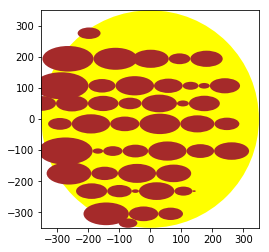

In [142]:
r = 350
circle = pat.Circle((0,0), radius= r)
fig,ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.add_artist(circle)
circle.set_facecolor("yellow")
x = -r
y = -r + Potatoes[0].small_axis/2
while(x ** 2 + y ** 2 > r ** 2):
    x += 0.1
x += Potatoes[0].big_axis/2
ax.set_xlim(-r,r)
ax.set_ylim(-r,r)
j = 1
i = 0
finish = 0
start = 0
while i < len(Potatoes) - 1:
    if(finish != 0):
        for ellipse in ax.artists[start+1:finish+1]:
            while(y < ellipse.center[1] + ellipse.height):
                y += 0.1
             
    ellipse = pat.Ellipse(xy = (x,y),width = Potatoes[i].big_axis,height = Potatoes[i].small_axis)
    ax.add_artist(ellipse)
    ellipse.set_facecolor("brown")
    x += (Potatoes[i].big_axis + Potatoes[i+1].big_axis) / 2
    if((x + (Potatoes[i+1].big_axis) / 2) ** 2 + y ** 2 >= r ** 2):
        x = -r
        start = finish
        finish = i
        print start,finish
        while(x** 2 + (y+ax.artists[j].height) ** 2 >= r ** 2):
            x += 0.1
        if((y + ax.artists[j].height / 2) ** 2 >= r ** 2):
            break
        x += Potatoes[i].big_axis / 2
        y += ax.artists[j].height
    i += 1
    j += 1
len(ax.artists)
